In [1]:
import pandas as pd #clean
import numpy as np #math
import matplotlib.pyplot as plt #draw
import seaborn as sns #draw
%matplotlib inline
#------------------------------------------------------------------------------------------
#models Classification
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
from sklearn.svm import SVC,LinearSVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#---------------------------------------------------------------------------------------
#Models Regression
from sklearn.linear_model import LogisticRegression,Lasso,Ridge,LinearRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler,PolynomialFeatures
from mlxtend.preprocessing import TransactionEncoder
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
#------------------------------------------------------------------------------------------
from mlxtend.frequent_patterns import association_rules,apriori
import statsmodels.api as sm
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings("ignore")

# Load data 

In [347]:
data=pd.read_csv("Loan approval prediction.csv") 
data.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [275]:
data['loan_intent'].value_counts()

loan_intent
EDUCATION            12271
MEDICAL              10934
PERSONAL             10016
VENTURE              10011
DEBTCONSOLIDATION     9133
HOMEIMPROVEMENT       6280
Name: count, dtype: int64

# pre_processing and clean

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [442]:
data['person_home_ownership'].value_counts()

person_home_ownership
RENT        30594
MORTGAGE    24824
OWN          3138
OTHER          89
Name: count, dtype: int64

In [443]:
dic={'RENT':0,'MORTGAGE':1,'OWN':2,'OTHER':3}

In [346]:
data.isnull().sum()    #check for missing value

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
Age_th                        0
dtype: int64

In [5]:
data.duplicated().sum()   #check for duplicate

0

In [6]:
data.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  int32  
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  int32  
 6   loan_grade                  58645 non-null  int32  
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  int32  
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int32(4), int64(

In [12]:
from sklearn.preprocessing import RobustScaler         #scale for data

scaler = RobustScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [13]:
data.describe()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,1.673578,4.701015,2.519430,1.066638,9217.556518,10.677874,0.159238,0.148384,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,1.452534,3.959784,1.722896,1.046181,5563.807384,3.034697,0.091692,0.355484,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,0.000000,0.000000,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,0.000000,2.000000,1.000000,0.000000,5000.000000,7.880000,0.090000,0.000000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,3.000000,4.000000,3.000000,1.000000,8000.000000,10.750000,0.140000,0.000000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,3.000000,7.000000,4.000000,2.000000,12000.000000,12.990000,0.210000,0.000000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,3.000000,123.000000,5.000000,6.000000,35000.000000,23.220000,0.830000,1.000000,30.000000,1.000000


# EDA

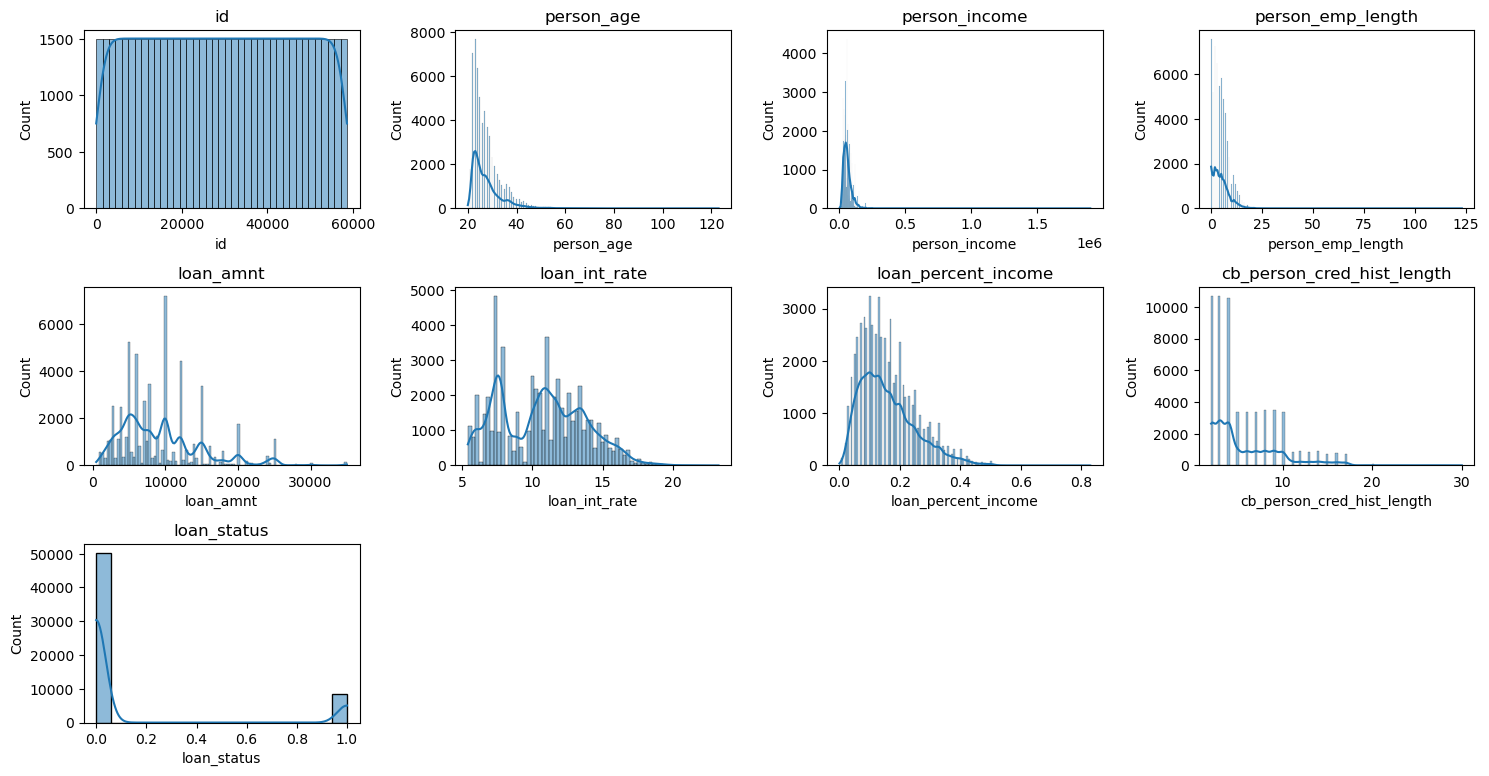

In [242]:
# Visualize the distribution of numerical features

numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data[feature], kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

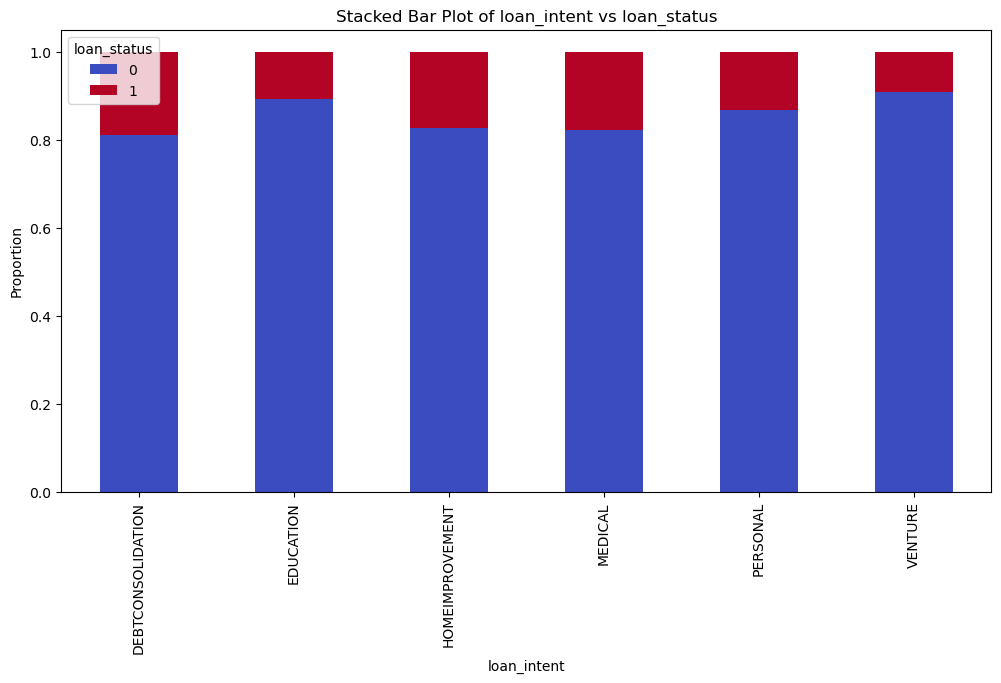

In [274]:
def stacked_bar_plot(data, feature, target='loan_status'):
    crosstab = pd.crosstab(data[feature], data[target], normalize='index')
    crosstab.plot(kind='bar', stacked=True, figsize=(12, 6), cmap='coolwarm')
    plt.title(f'Stacked Bar Plot of {feature} vs {target}')
    plt.ylabel('Proportion')
    plt.show()
stacked_bar_plot(data, 'loan_intent')

# The DEBTCONSOLIDATION is the one who allowed me to take the loan the most.

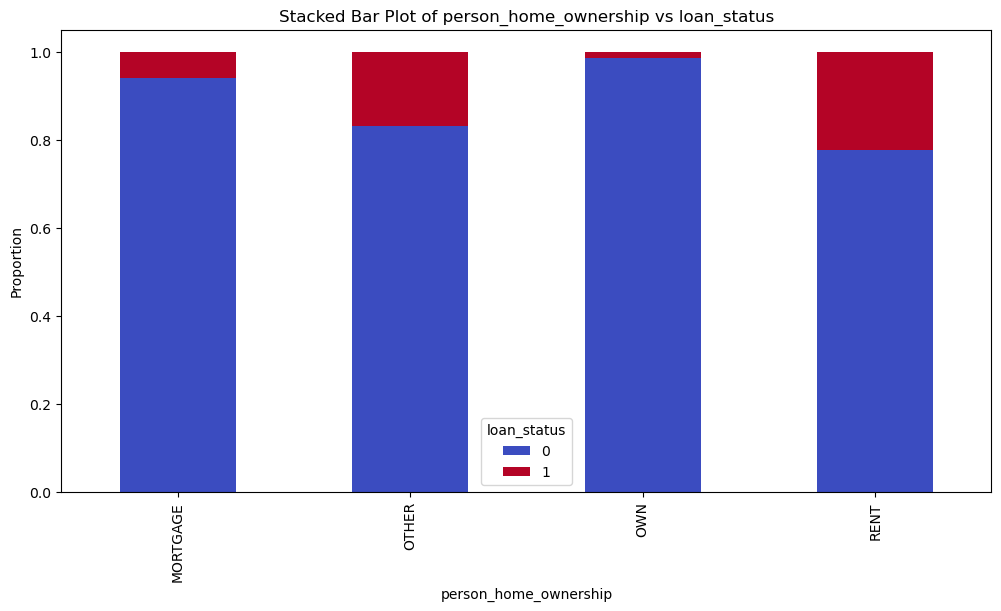

In [276]:
stacked_bar_plot(data, 'person_home_ownership')

# The RENT is the one who allowed me to take the loan the most.

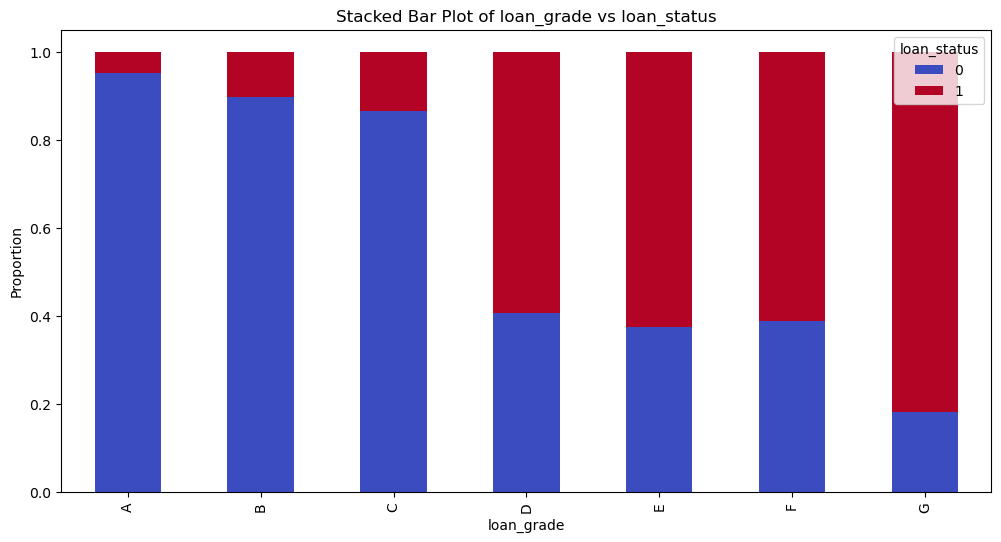

In [277]:
stacked_bar_plot(data, 'loan_grade')

# The grade G is the one who allowed me to take the loan the most.

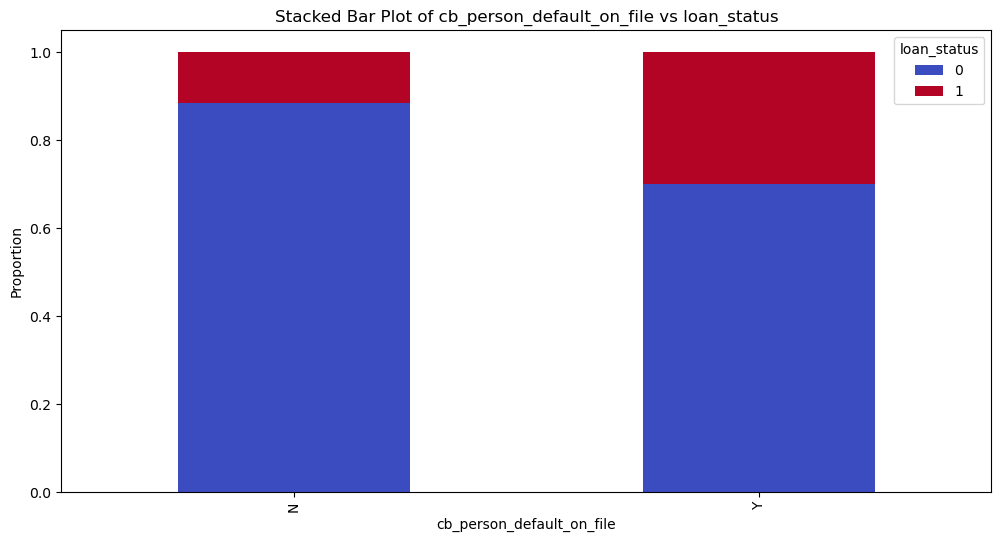

In [278]:
stacked_bar_plot(data, 'cb_person_default_on_file')

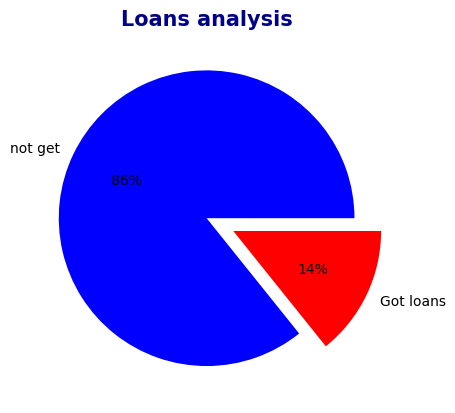

In [298]:
plt.pie(data['loan_status'].value_counts(),
        labels=['not get',
                'Got loans'],
        autopct='%1.0f%%',
        explode=[0.0,0.2],
        colors=['blue','red'])
plt.title('Loans analysis',fontdict={'fontsize':15,'fontweight':'bold','color':'darkblue'})
plt.show()

# This is how we understand that the rate of loan rejection is much higher than acceptance, and this is something we must improve because of my model.

In [326]:
#  function to categorize ages
def categorize_age(age):
    if 20 <= age < 30:
        return '20th'
    elif 30<= age <40:
        return '30th'
    elif 40 <= age < 50 :
        return '40th'
    elif 50 <= age < 60 :
        return '50th'
    elif 60 <= age < 66 :
        return '60th'
    elif 66 <= age  :
        return 'others'

data['Age_th'] = data['person_age'].apply(categorize_age)
#  I divided the ages into categories so I could put them in a bar

In [327]:
# Group by Age_th and count ids
data_got_loans=data[data['loan_status']==1]
Age_dist = data_got_loans.groupby('Age_th')['id'].count().reset_index()
print(Age_dist)

fig = px.bar(Age_dist, x='Age_th', y='id',
             title='Most Age Getting Loan in 2024',
             labels={'Age_th': 'Age Tiers', 'id': 'Distribution'},
             text='id')

fig.show()

   Age_th    id
0    20th  6210
1    30th  1683
2    40th   349
3    50th    89
4    60th    12
5  others     7


# Label Encoder

In [335]:
label_encoder=LabelEncoder() #convert from object to numeric

In [338]:
obj=data.select_dtypes(include='object')

In [339]:
numeric=data.select_dtypes(exclude='object')

In [342]:
for i in range(0,obj.shape[1]):
       obj.iloc[:,i]=label_encoder.fit_transform(obj.iloc[:,i])

In [406]:
data1=pd.concat([obj,numeric],axis=1) #concat data

In [407]:
obj=obj.astype("int")

In [445]:
data1

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file,Age_th,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
0,3,1,1,0,1,0,37,35000,0.0,6000,11.49,0.17,14,0
1,2,3,2,0,0,1,22,56000,6.0,4000,13.35,0.07,2,0
2,2,4,0,0,0,2,29,28800,8.0,6000,8.90,0.21,10,0
3,3,5,1,0,1,3,30,70000,14.0,12000,11.11,0.17,5,0
4,3,3,0,0,0,4,22,60000,2.0,6000,6.92,0.10,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,0,1,3,1,1,58640,34,120000,5.0,25000,15.95,0.21,10,0
58641,3,3,2,0,0,58641,28,28800,0.0,10000,12.73,0.35,8,1
58642,3,1,3,0,0,58642,23,44000,7.0,6800,16.00,0.15,2,1
58643,3,1,0,0,0,58643,22,30000,2.0,5000,8.90,0.17,3,0


In [438]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_home_ownership       58645 non-null  int32  
 1   loan_intent                 58645 non-null  int32  
 2   loan_grade                  58645 non-null  int32  
 3   cb_person_default_on_file   58645 non-null  int32  
 4   Age_th                      58645 non-null  int32  
 5   id                          58645 non-null  int64  
 6   person_age                  58645 non-null  int64  
 7   person_income               58645 non-null  int64  
 8   person_emp_length           58645 non-null  float64
 9   loan_amnt                   58645 non-null  int64  
 10  loan_int_rate               58645 non-null  float64
 11  loan_percent_income         58645 non-null  float64
 12  cb_person_cred_hist_length  58645 non-null  int64  
 13  loan_status                 586

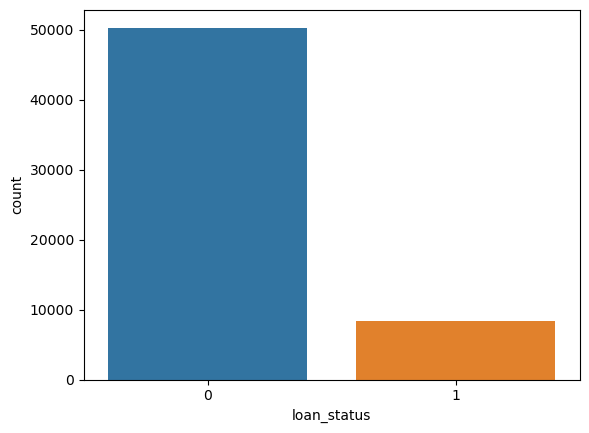

In [409]:
sns.countplot(x='loan_status', data=data)  #not balance
plt.show()

In [410]:
X=data1.drop(['id','loan_status'],axis=1)
y=data1['loan_status']

In [411]:
from imblearn.combine import SMOTEENN       #for balance
from collections import Counter 
smote_enn = SMOTEENN(random_state=42)
X_combined, y_combined = smote_enn.fit_resample(X, y)

print(f"Original dataset shape: {Counter(y)}")
print(f"Combined SMOTEENN dataset shape: {Counter(y_combined)}")

Original dataset shape: Counter({0: 50295, 1: 8350})
Combined SMOTEENN dataset shape: Counter({1: 41562, 0: 39023})


# Build Model

# Random Forest

In [412]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.20, random_state=0)

In [413]:
classifier = RandomForestClassifier(max_depth=300, n_estimators= 300,random_state=42,criterion='gini')#use model Randomforest

In [414]:
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=300, n_estimators=300, random_state=42)

In [415]:
y_pred = classifier.predict(X_test)

In [416]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[7485  243]
 [ 262 8127]]


0.9686666253024756

In [417]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      7728
           1       0.97      0.97      0.97      8389

    accuracy                           0.97     16117
   macro avg       0.97      0.97      0.97     16117
weighted avg       0.97      0.97      0.97     16117



# KNeighbors

In [418]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.20, random_state=0)

In [419]:
classifier = KNeighborsClassifier(n_neighbors =1, metric = 'manhattan', p =2)#1=man ,2=ecu  #use model Kneighbors
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

In [420]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [421]:
print("Accuracy {0:.2f}%".format(100*accuracy_score(y_pred, y_test)))

Accuracy 99.24%


In [422]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7728
           1       0.99      0.99      0.99      8389

    accuracy                           0.99     16117
   macro avg       0.99      0.99      0.99     16117
weighted avg       0.99      0.99      0.99     16117



In [365]:
test_error_rates = []    #find best K

for k in range(1,20):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train,y_train) 
   
    y_pred_test = knn_model.predict(X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

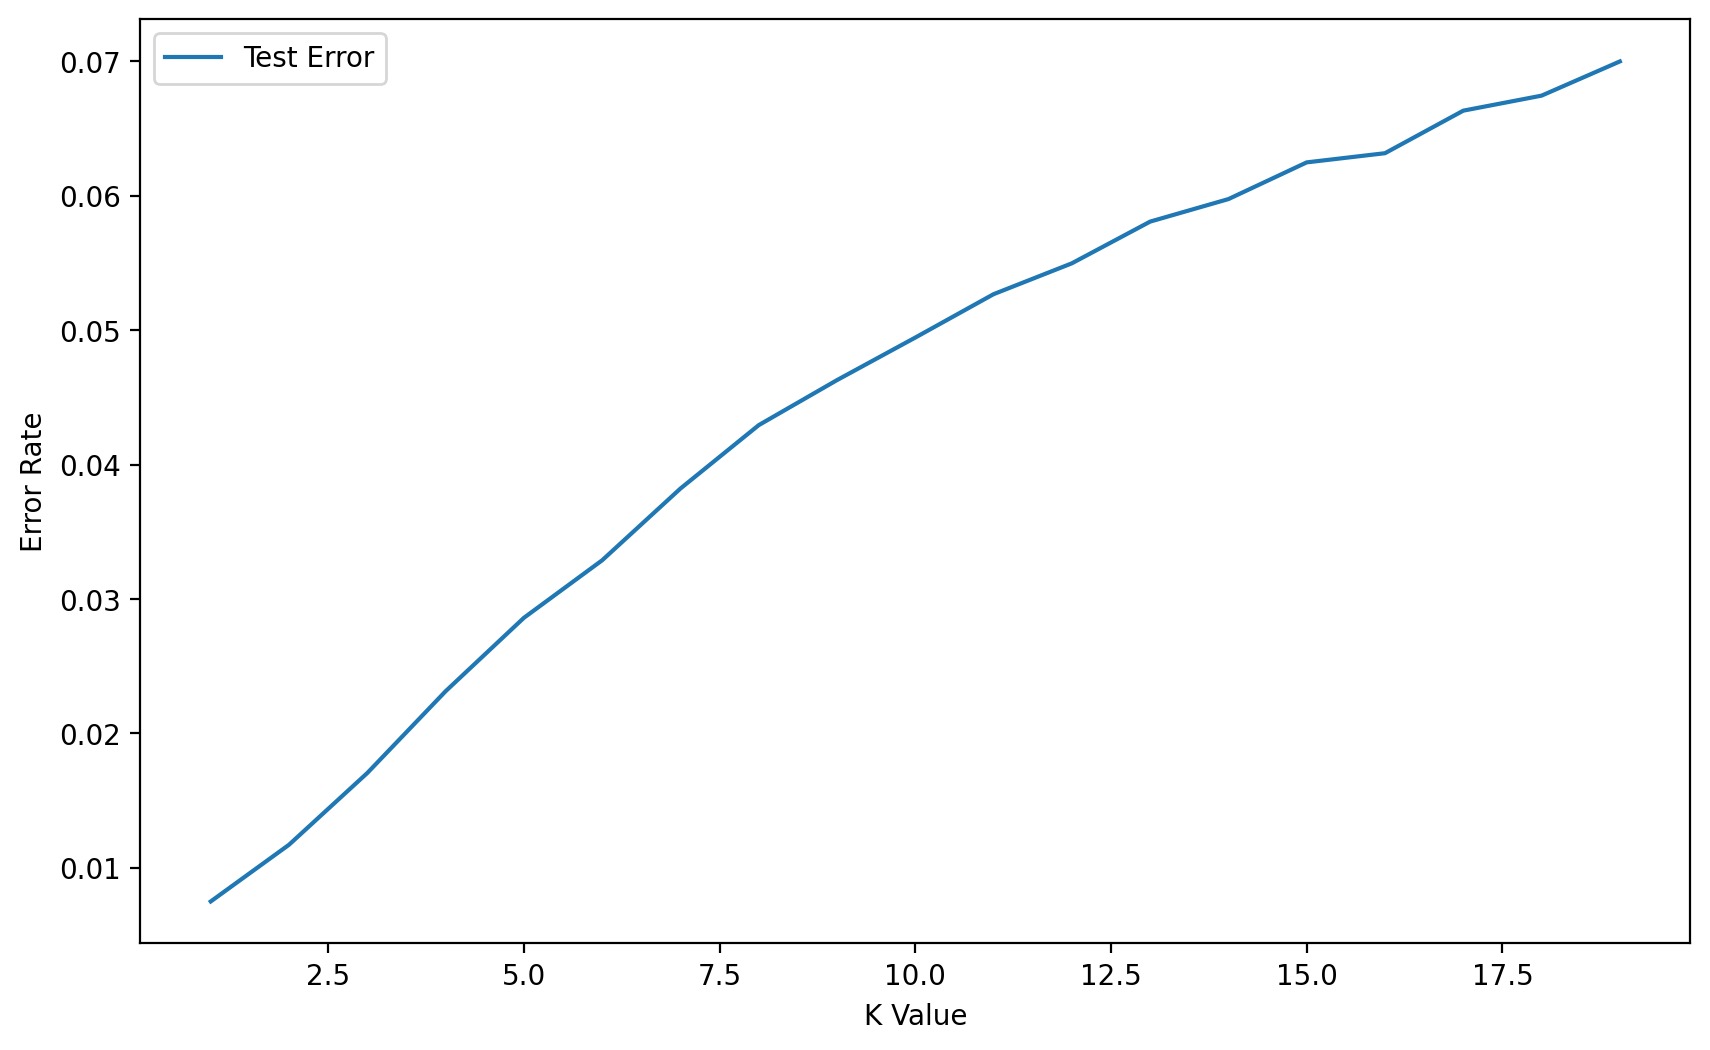

In [366]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,20),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

# Logistic Regression

In [423]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.30, random_state=0)

In [424]:
model = LogisticRegression() #use model Logistic

In [425]:
model.fit(X_train,y_train)

LogisticRegression()

In [426]:
y_pred = model.predict(X_test)

In [427]:
print(accuracy_score(y_pred,y_test))

0.8461283917935142


In [428]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83     11517
           1       0.84      0.88      0.86     12659

    accuracy                           0.85     24176
   macro avg       0.85      0.84      0.85     24176
weighted avg       0.85      0.85      0.85     24176



# XGboost

In [429]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.20, random_state=42)

In [430]:
gb = XGBClassifier( n_estimators=300,learning_rate=0.08, gamma=0.02,subsample=0.75,colsample_bytree=1, max_depth=15)#use XGB

In [431]:
gb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.02,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.08, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [432]:
y_test_preds = gb.predict(X_test)

In [433]:
accuracy_score(y_test, y_test_preds)

0.9834336414965564

In [434]:
print(classification_report(y_test,y_test_preds))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      7806
           1       0.99      0.98      0.98      8311

    accuracy                           0.98     16117
   macro avg       0.98      0.98      0.98     16117
weighted avg       0.98      0.98      0.98     16117



In [262]:
import pickle    #save my model

In [435]:
pickle.dump(gb, open('my_model_loan.pkl','wb'))

In [436]:
model = pickle.load(open('my_modelp.pkl','rb'))

In [437]:
model.predict(([[28, 28800,3,0.0,3,2,10000,12.73,0.35,0,8]])) #predict

array([1])